In [37]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
df=pd.read_csv('final_data.csv')

In [38]:
df.head()


,Title,Dom_Gross_mil,Int_Gross_mil,Worldwide_mil,Opening_mil,Budget_mil,Rel_Date,Runtime,Genre,Rating,Rel_Month,Gross_Domestic_Revenue
0,Star Wars: Episode VII - The Force Awakens (2015),936.662225,1132.859475,2069.521700,247.966675,245.0,"December 16, 2015\n (EMEA, APAC)",2 hr 18 min,Action\n \n Adventure\n \n ...,PG-13,December,688.695550
1,Avengers: Endgame (2019),858.373000,1939.128328,2797.501328,357.115007,356.0,"April 24, 2019\n (21 markets)",3 hr 1 min,Action\n \n Adventure\n \n ...,PG-13,April,501.257993
2,Avatar (2009),760.507625,2086.738578,2847.246203,77.025481,237.0,"December 16, 2009\n (EMEA, LATAM)",2 hr 42 min,Action\n \n Adventure\n \n ...,PG-13,December,683.482144
3,Titanic (1997),659.363944,1542.283320,2201.647264,28.638131,200.0,"December 19, 1997\n (Domestic)",3 hr 14 min,Drama\n \n Romance,PG-13,December,630.725813
4,Jurassic World (2015),652.385625,1018.130819,1670.516444,208.806270,150.0,"June 10, 2015\n (9 markets)",2 hr 4 min,Action\n \n Adventure\n \n ...,PG-13,June,443.579355


In [39]:
lml = smf.ols('Gross_Domestic_Revenue ~ Int_Gross_mil + Opening_mil + Budget_mil', data=df)
fit = lml.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Gross_Domestic_Revenue   R-squared:                       0.548
Model:                                OLS   Adj. R-squared:                  0.546
Method:                     Least Squares   F-statistic:                     324.7
Date:                    Fri, 01 Oct 2021   Prob (F-statistic):          4.54e-138
Time:                            01:15:31   Log-Likelihood:                -4342.3
No. Observations:                     808   AIC:                             8693.
Df Residuals:                         804   BIC:                             8711.
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        72.7307      3.364     21.619      0.000      66.127      79.334
Int_Gross_mil     0.2701      0.013     21.151      0.000       0.245       0.295
Opening_mil       0.3662      0.076      4.845      0.000       0.218       0.515
Budget_mil       -0.2953      0.041     -7.137      0.000      -0.376      -0.214
==============================================================================
Omnibus:                      262.006   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1284.654
Skew:                           1.403   Prob(JB):                    1.10e-279
Kurtosis:                       8.504   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
#set X and y as datasets
X = df.loc[:,['Int_Gross_mil','Budget_mil','Opening_mil']]
y = df['Gross_Domestic_Revenue']

#Split data into two sections: Train+Val, Testing 
#results in 20 test, 80 training
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=25)

In [41]:
#CROSS VALIDATION LINEAR REGRESSION ON TRAINING DATA
#don't need standard scaler here bc regular linear regression

kf = KFold(n_splits=5, shuffle=True, random_state = 42)

#Create an empty model
#regular cross validation 
lm_cv = LinearRegression()

#fit model
lm_cv.fit(X, y)

#all five values
print(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(lm_cv, X, y, cv=kf, scoring='r2')))

[0.49726807 0.55792945 0.41000887 0.50227241 0.60395506]
0.5142867728635862


In [42]:
std = StandardScaler()
std.fit(X.values)

X_scaled = std.transform(X.values)
X_test_scaled = std.transform(X_test.values)

In [43]:
rm_cv = RidgeCV(alphas=[0.1, 1.0, 10.0])

new_ridge=rm_cv.fit(X_scaled, y)
best_alpha = new_ridge.alpha_

print(best_alpha)

0.1


In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
RidgeCV = Ridge(alpha=0.1)

#fit model
RidgeCV.fit(X_scaled, y)

#results from ridge reg cross val
#all five values
print(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(RidgeCV, X_scaled, y, cv=kf, scoring='r2')))

[0.4972506  0.55789591 0.41004153 0.50233442 0.6039407 ]
0.5142926326858981


In [45]:
ls_cv = LassoCV(alphas=[0.1, 1.0, 10.0])

new_lasso=ls_cv.fit(X_scaled, y)
best_alpha = new_lasso.alpha_

print(best_alpha)

0.1


In [46]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
LassoCV = Lasso(alpha=0.1)

#fit model
LassoCV.fit(X_scaled, y)

#results from ridge reg cross val
#all five values
print(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2'))
#average of 5
print(np.mean(cross_val_score(LassoCV, X_scaled, y, cv=kf, scoring='r2')))

[0.49752129 0.55712873 0.40970199 0.50307228 0.60410888]
0.5143066348933878


In [49]:
test_set_pred = LassoCV.predict(X_test_scaled)

In [50]:
r2_score(y_test, test_set_pred)

0.6016127961529755

In [51]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

y_err=mae(y_test, test_set_pred)
print(y_err)

33.599493256346186


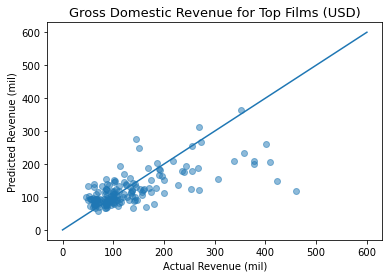

In [17]:
plt.scatter(y_test, test_set_pred, alpha=.5)
plt.plot(np.linspace(0,600,100), np.linspace(0,600,100))
plt.xlabel("Actual Revenue (mil)")
plt.ylabel("Predicted Revenue (mil)")
plt.title("Gross Domestic Revenue for Top Films (USD)", fontsize=13)

plt.savefig('Gross_Rev.png')